In [1]:
# Clean Training Dataset

In [3]:
import sys

sys.path.append("../../")

In [17]:
import ast

import pandas as pd
from scipy.spatial import distance

from climatesense_checkthat2025_task4.utils.data import plot_variable_distribution
from climatesense_checkthat2025_task4.utils.nlp import replace_mentions, replace_urls, snake_to_titlecase


In [18]:
TRAIN = "../../data/raw/task4/subtask_4b/subtask4b_query_tweets_train.tsv"
DEVEL = "../../data/raw/task4/subtask_4b/subtask4b_query_tweets_dev.tsv"

# Subtask 4b Training Dataset

In [21]:
# Load the data
st4b_train_df = pd.read_csv(TRAIN, sep="\t")
print(st4b_train_df.head(5))
st4b_dev_df = pd.read_csv(DEVEL, sep="\t")
print(st4b_dev_df.head(5))


# Check duplicates from train (text only) -- we will use the next index, same results
selto = st4b_train_df.drop_duplicates(["tweet_text"]).index
print(f"Check duplicates on train data (text only), size before: {len(st4b_train_df)} -> size after: {len(selto)}")

# Check duplicates from train
selt = st4b_train_df.drop_duplicates(["tweet_text", "cord_uid"]).index
print(f"Check duplicates on train data, size before: {len(st4b_train_df)} -> size after: {len(selt)}")

# Check duplicates from dev
seld = st4b_dev_df.drop_duplicates(["tweet_text", "cord_uid"]).index
print(f"Check duplicates on dev data, size before: {len(st4b_dev_df)} -> size after: {len(seld)}")

# Remove duplicates from training data
# Select only the row with index in selt:
st4b_train_df = st4b_train_df.loc[selt]
st4b_train_df.to_csv("../../data/processed/task4/subtask_4b/subtask4b_query_tweets_train_clean.tsv", sep="\t", index=False)
st4b_dev_df = st4b_dev_df.loc[seld]
st4b_dev_df.to_csv("../../data/processed/task4/subtask_4b/subtask4b_query_tweets_dev_clean.tsv", sep="\t", index=False)

#st4b_train_df

   post_id                                         tweet_text  cord_uid
0        0  Oral care in rehabilitation medicine: oral vul...  htlvpvz5
1        1  this study isn't receiving sufficient attentio...  4kfl29ul
2        2  thanks, xi jinping. a reminder that this study...  jtwb17u8
3        3  Taiwan - a population of 23 million has had ju...  0w9k8iy1
4        4  Obtaining a diagnosis of autism in lower incom...  tiqksd69
   post_id                                         tweet_text  cord_uid
0       16  covid recovery: this study from the usa reveal...  3qvh482o
1       69  "Among 139 clients exposed to two symptomatic ...  r58aohnu
2       73  I recall early on reading that researchers who...  sts48u9i
3       93  You know you're credible when NIH website has ...  3sr2exq9
4       96  Resistance to antifungal medications is a grow...  ybwwmyqy
Check duplicates on train data (text only), size before: 12853 -> size after: 12842
Check duplicates on train data, size before: 12853 -

,post_id,tweet_text,cord_uid
0,0,Oral care in rehabilitation medicine: oral vul...,htlvpvz5
1,1,this study isn't receiving sufficient attentio...,4kfl29ul
2,2,"thanks, xi jinping. a reminder that this study...",jtwb17u8
3,3,Taiwan - a population of 23 million has had ju...,0w9k8iy1
4,4,Obtaining a diagnosis of autism in lower incom...,tiqksd69
...,...,...,...
12848,14248,"""evidence on covid-19 reveals a growing body o...",9169o29b
12849,14249,Outdoor lighting has detrimental impacts on lo...,s2bpha8l
12850,14250,"26/ and influenza virus (and other pathogens, ...",atloc9th
12851,14251,does it?'sars-cov-2-naïve vaccinees had a 13.0...,t4y1ylb3


In [23]:
# Set dev mode on or off
DEV_MODE = False

In [24]:
st4b_df = DEV_MODE and st4b_train_df or st4b_dev_df

count
1     549
2     119
3      40
4      22
5      11
6       6
9       5
12      5
7       3
23      2
8       2
14      2
15      2
10      1
11      1
22      1
24      1
Name: count, dtype: int64


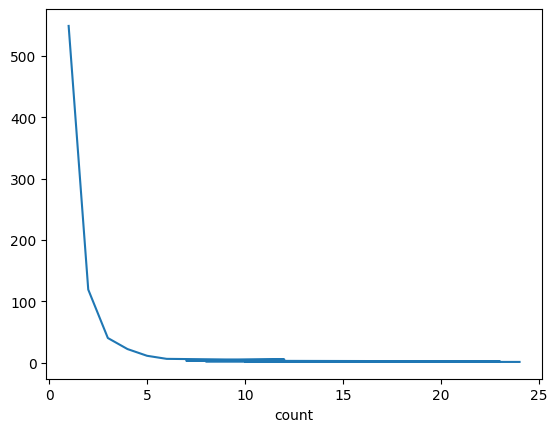

In [28]:
# Number of distinct values of 'cord_uid'
import matplotlib.pyplot as plt
#value_counts = st4b_df['cord_uid'].value_counts()
value_counts = st4b_df['cord_uid'].value_counts()
#print(value_counts)
# Count of papers referenced by number of tweets (Most papers are referenced by a single tweet)
print(value_counts.value_counts())
value_counts.value_counts().plot()
plt.show()

In [48]:
# Load the collection
import pickle

st4b_collection_df = pickle.load(open("../../data/raw/task4/subtask_4b/subtask4b_collection_data.pkl",'rb'))

print(len(st4b_collection_df))

# Check if duplicates uid exists
seluid = st4b_collection_df.drop_duplicates(["cord_uid"]).index
print(f"Size before: {len(st4b_collection_df)} -> size of unique UIDs: {len(seluid)}")

# Check if duplicates exist
seltit = st4b_collection_df.drop_duplicates(["title"]).index
print(f"Size before: {len(st4b_collection_df)} -> size of unique titles: {len(seltit)}")
# No duplicates found

7718
Size before: 7718 -> size of unique UIDs: 7718
Size before: 7718 -> size of unique titles: 7676


FIXME: There are articles duplicates with different ids

772  unique coord_uids
  Topic  Count
0   Yes    772
1    No   6946


<Axes: ylabel='Count'>

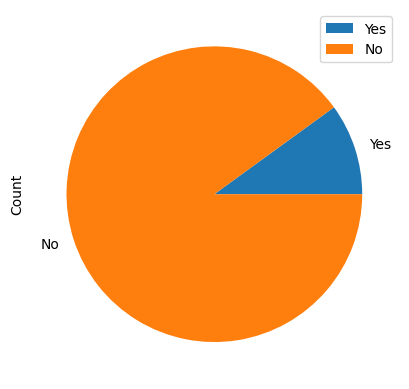

In [62]:
from numpy import unique
# How many articles have actually a reference in the training dataset?
uids = list(unique(st4b_df['cord_uid'].values))
print(len(uids),' unique coord_uids')
collix = st4b_collection_df.set_index(['cord_uid']).index
trainix = st4b_df.set_index(['cord_uid']).index

df323 = st4b_collection_df[collix.isin(trainix)]

coll_y_n_df = pd.DataFrame({'Topic': ['Yes', 'No'],
                   'Count': [len(df323), len(st4b_collection_df) - len(df323)]})
#print(coll_y_n_df)
coll_y_n_df.set_index('Topic').plot.pie(y='Count', legend=True)
#plt.show()